In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [2]:
random_state = 0

# Loading data

In [3]:
data = pd.read_csv('CMAPSSData/train_FD001.txt', header=None, sep=' ')
data_test = pd.read_csv('CMAPSSData/test_FD001.txt', header=None, sep=' ')
y_test = pd.read_csv('CMAPSSData/RUL_FD001.txt', header=None)

In [4]:
data = data.drop([26,27], axis= 1)
data_test = data_test.drop([26,27], axis= 1)

In [5]:
sensors = []
for i in np.arange(1,22):
    sensors.append('sensor'+str(i))
data.columns=['asset','cycle','setting1','setting2','setting3']+sensors
data_test.columns=['asset','cycle','setting1','setting2','setting3']+sensors

In [6]:
data.iloc[:,:].head()

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
data_test.head()

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [8]:
y_test.head()

,0
0,112
1,98
2,69
3,82
4,91


In [9]:
data.head()

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
data[(data.asset.iloc[1:]-data.asset.iloc[:-1])!=0]

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [11]:
t = np.array([0,0,1,1,1,1,3,3])
diffs_a = t[:-1] - t[1:]
diffs_a

array([ 0, -1,  0,  0,  0, -2,  0])

In [12]:
np.append(t[np.where(diffs_a != 0)],t[-1])

array([0, 1, 3])

# EDA

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
asset       20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
sensor1     20631 non-null float64
sensor2     20631 non-null float64
sensor3     20631 non-null float64
sensor4     20631 non-null float64
sensor5     20631 non-null float64
sensor6     20631 non-null float64
sensor7     20631 non-null float64
sensor8     20631 non-null float64
sensor9     20631 non-null float64
sensor10    20631 non-null float64
sensor11    20631 non-null float64
sensor12    20631 non-null float64
sensor13    20631 non-null float64
sensor14    20631 non-null float64
sensor15    20631 non-null float64
sensor16    20631 non-null float64
sensor17    20631 non-null int64
sensor18    20631 non-null int64
sensor19    20631 non-null float64
sensor20    20631 non-null float64
sensor21    20631 non-nu

In [14]:
print(data.shape)
for i in data.columns:
    print(str(i)+' '+str(data[i].nunique()))
print(data_test.shape)
for i in data_test.columns:
    print(str(i)+' '+str(data_test[i].nunique()))

(20631, 26)
asset 100
cycle 362
setting1 158
setting2 13
setting3 1
sensor1 1
sensor2 310
sensor3 3012
sensor4 4051
sensor5 1
sensor6 2
sensor7 513
sensor8 53
sensor9 6403
sensor10 1
sensor11 159
sensor12 427
sensor13 56
sensor14 6078
sensor15 1918
sensor16 1
sensor17 13
sensor18 1
sensor19 1
sensor20 120
sensor21 4745
(13096, 26)
asset 100
cycle 303
setting1 150
setting2 14
setting3 1
sensor1 1
sensor2 262
sensor3 2361
sensor4 2954
sensor5 1
sensor6 2
sensor7 415
sensor8 41
sensor9 4047
sensor10 1
sensor11 136
sensor12 357
sensor13 43
sensor14 3786
sensor15 1506
sensor16 1
sensor17 9
sensor18 1
sensor19 1
sensor20 103
sensor21 3555


In [15]:
print("There are",data.shape[0],"cycles in the test dataset")
print("Mean no. of cycles for an asset is ",data.groupby('asset')['cycle'].agg(['count','max'])['max'].mean())
data.groupby('asset')['cycle'].agg(['count','max']).T

There are 20631 cycles in the test dataset
Mean no. of cycles for an asset is  206.31


asset,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,192,287,179,189,269,188,259,150,201,222,...,135,341,155,258,283,336,202,156,185,200
max,192,287,179,189,269,188,259,150,201,222,...,135,341,155,258,283,336,202,156,185,200


In [16]:
data_test.tail()

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699
13095,100,198,0.0013,0.0003,100.0,518.67,642.95,1601.62,1424.99,14.62,...,521.07,2388.05,8214.64,8.4903,0.03,396,2388,100.0,38.70,23.1855


In [17]:
print("I can probably take like last ~15% for validation, it's around",data.shape[0]*.15)
data.groupby('asset')['cycle'].agg(['count','max'])['max'][-14:].sum()

I can probably take like last ~15% for validation, it's around 3094.65


3013

In [18]:
data.iloc[data.shape[0]-3013,:]

asset         87.0000
cycle          1.0000
setting1      -0.0007
setting2      -0.0004
setting3     100.0000
sensor1      518.6700
sensor2      642.6700
sensor3     1595.3300
sensor4     1404.2300
sensor5       14.6200
sensor6       21.6100
sensor7      554.2900
sensor8     2388.0400
sensor9     9060.4500
sensor10       1.3000
sensor11      47.3600
sensor12     522.0700
sensor13    2388.0100
sensor14    8143.6000
sensor15       8.4386
sensor16       0.0300
sensor17     396.0000
sensor18    2388.0000
sensor19     100.0000
sensor20      38.8700
sensor21      23.3231
Name: 17618, dtype: float64

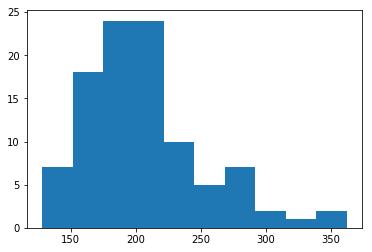

In [19]:
plt.hist(data.groupby('asset')['cycle'].agg(['count','max'])['max']);

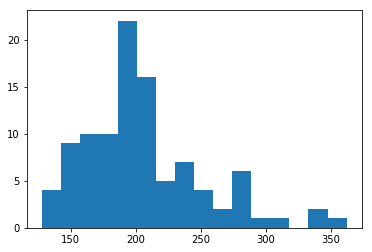

In [20]:
plt.hist(data.groupby('asset')['cycle'].agg(['count','max'])['max'],bins=16);

## Getting info about the no of unique values

In [21]:
for i in data.columns:
    if data[i].nunique()<15:
        print("\t"+str(i)+' '+str(data[i].nunique()))
        print(data[i].unique())
        print(data[i].value_counts())

	setting2 13
[-0.0004 -0.0003  0.0003  0.     -0.0002 -0.0001  0.0001  0.0002  0.0004
  0.0005  0.0006 -0.0005 -0.0006]
-0.0003    2104
 0.0001    2097
 0.0000    2070
 0.0003    2065
-0.0004    2051
-0.0002    2049
 0.0002    2038
-0.0001    2029
 0.0004    1997
 0.0005    1068
-0.0005     958
 0.0006      71
-0.0006      34
Name: setting2, dtype: int64
	setting3 1
[100.]
100.0    20631
Name: setting3, dtype: int64
	sensor1 1
[518.67]
518.67    20631
Name: sensor1, dtype: int64
	sensor5 1
[14.62]
14.62    20631
Name: sensor5, dtype: int64
	sensor6 2
[21.61 21.6 ]
21.61    20225
21.60      406
Name: sensor6, dtype: int64
	sensor10 1
[1.3]
1.3    20631
Name: sensor10, dtype: int64
	sensor16 1
[0.03]
0.03    20631
Name: sensor16, dtype: int64
	sensor17 13
[392 390 393 391 394 396 395 397 398 389 399 388 400]
393    5445
392    4578
394    4063
395    2339
391    2022
396    1185
390     452
397     436
398      72
389      30
399       7
388       1
400       1
Name: sensor17, dtype: int

## Dropping columns with just 1 value

In [22]:
columns_to_drop = []
for i in data.columns:
    if data[i].nunique()==1:
        columns_to_drop.append(i)
columns_to_drop

['setting3',
 'sensor1',
 'sensor5',
 'sensor10',
 'sensor16',
 'sensor18',
 'sensor19']

In [23]:
print("before dropping",data.shape)
data = data.drop(columns_to_drop, axis= 1)
print("after dropping",data.shape)

before dropping (20631, 26)
after dropping (20631, 19)


In [24]:
columns_to_drop = []
for i in data_test.columns:
    if data_test[i].nunique()==1:
        columns_to_drop.append(i)
columns_to_drop

['setting3',
 'sensor1',
 'sensor5',
 'sensor10',
 'sensor16',
 'sensor18',
 'sensor19']

In [25]:
print("before dropping",data_test.shape)
data_test = data_test.drop(columns_to_drop, axis= 1)
print("after dropping",data_test.shape)

before dropping (13096, 26)
after dropping (13096, 19)


## Just some fiddling with graphs

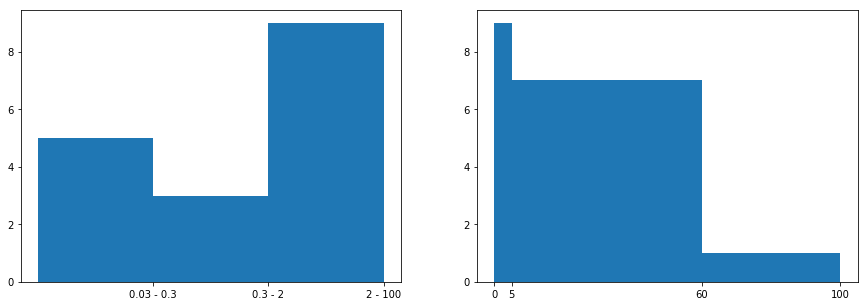

In [26]:
bins = [0.03,0.3,2,100] # your bins
data_f = [0.04,0.07,0.1,0.2,0.2,0.8,1,1.5,4,5,7,8,43,45,54,56,99] # random data

hist, bin_edges = np.histogram(data_f,bins) # make the histogram

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot the histogram heights against integers on the x axis
ax[0].bar(range(len(hist)),hist,width=1) 

# Set the ticks to the middle of the bars
ax[0].set_xticks([0.5+i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax[0].set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

# Plot the histogram heights against integers on the x axis
ax[1].hist(data_f,bins=[0,5,60,100]) 

# Set the ticks to the middle of the bars
ax[1].set_xticks([0,5,60,100])

# Set the xticklabels to a string that tells us what the bin edges were
#ax[1].set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

plt.show()

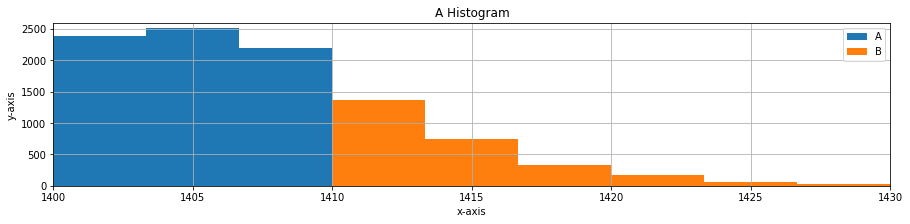

In [27]:
plt.figure(figsize=(15,3))
plt.axis([1400, 1430, 0, 2600])  

# From your example I am assuming that the maximum value is 6000
binBoundaries = np.linspace(1400,1430,10)

data_test[data_test.sensor4 < 1410]['sensor4'].hist(bins=binBoundaries, label='A') 
data_test[data_test.sensor4 >= 1410]['sensor4'].hist(bins=binBoundaries, label='B')

plt.title('A Histogram')  
plt.xlabel('x-axis')  
plt.ylabel('y-axis')  
plt.legend()

No handles with labels found to put in legend.


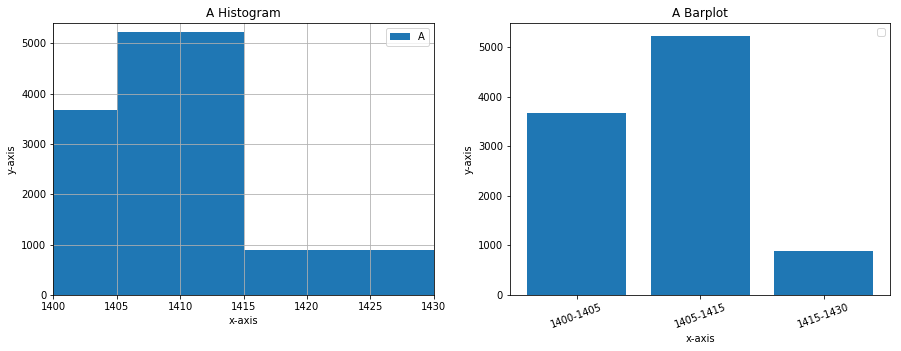

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.axis([1400, 1430, 0, 5400])  

# From your example I am assuming that the maximum value is 6000
binBoundaries = np.linspace(1400,1430,10)

#data_test['sensor4'].hist(bins=binBoundaries, label='A') 
data_test['sensor4'].hist(bins=[1400,1405,1415,1430], label='A') 

plt.title('A Histogram')  
plt.xlabel('x-axis')  
plt.ylabel('y-axis')  
plt.legend()

plt.subplot(1,2,2)
#plt.axis([1400, 1430, 0, 5400])  
bins = [1400,1405,1415,1430]
hist, bin_edges = np.histogram(data_test['sensor4'],bins) # make the histogram
plt.bar(range(len(hist)),hist) 
plt.title('A Barplot')
plt.xticks(range(len(hist)), ["1400-1405","1405-1415","1415-1430"], rotation=20)
plt.xlabel('x-axis')  
plt.ylabel('y-axis')  
plt.legend()

In [29]:
bins = [1400,1405,1415,1430]
hist, bin_edges = np.histogram(data_test['sensor4'],bins) # make the histogram
hist, bin_edges

(array([3677, 5223,  888], dtype=int64), array([1400, 1405, 1415, 1430]))

In [30]:
range(hist.min())

range(0, 888)

<BarContainer object of 3 artists>

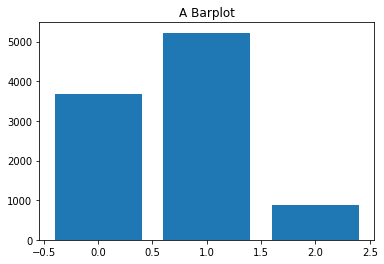

In [31]:
plt.title('A Barplot')  
bins = [1400,1405,1415,1430]
hist, bin_edges = np.histogram(data_test['sensor4'],bins) # make the histogram
plt.bar(range(len(hist)),hist) 


# Making the target

In [32]:
data['TTF'] = data.groupby(['asset'])['cycle'].transform(max)
data['TTF'] = data['TTF']-data['cycle']

In [33]:
data.iloc[190:194,:].head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,TTF
190,1,191,-0.0000,-0.0004,643.34,1602.36,1425.77,21.61,550.92,2388.28,9042.76,48.15,519.57,2388.30,8114.61,8.5174,394,38.45,23.1295,1
191,1,192,0.0009,-0.0000,643.54,1601.41,1427.20,21.61,551.25,2388.32,9033.22,48.25,520.08,2388.32,8110.93,8.5113,396,38.48,22.9649,0
192,2,1,-0.0018,0.0006,641.89,1583.84,1391.28,21.60,554.53,2388.01,9054.72,46.93,522.33,2388.06,8137.72,8.3905,391,38.94,23.4585,286
193,2,2,0.0043,-0.0003,641.82,1587.05,1393.13,21.61,554.77,2387.98,9051.31,47.24,522.70,2387.98,8131.09,8.4167,392,39.06,23.4085,285


In [34]:
y = pd.DataFrame(data['TTF'],columns=['TTF'])
data = data.drop(['TTF'], axis= 1)

In [35]:
data.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [36]:
data_test.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


## Converting regression to classification

In [37]:
def label_TTF(row):
    r = 'more100'
    if row<=10: r = 'less10'
    if ((row>10)and(row<=50)): r = '10to50'
    if ((row>50)and(row<=100)): r = '50to100'
    return r

In [38]:
data_test.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


In [39]:
y_test[0]

0     112
1      98
2      69
3      82
4      91
5      93
6      91
7      95
8     111
9      96
10     97
11    124
12     95
13    107
14     83
15     84
16     50
17     28
18     87
19     16
20     57
21    111
22    113
23     20
24    145
25    119
26     66
27     97
28     90
29    115
     ... 
70    118
71     50
72    131
73    126
74    113
75     10
76     34
77    107
78     63
79     90
80      8
81      9
82    137
83     58
84    118
85     89
86    116
87    115
88    136
89     28
90     38
91     20
92     85
93     55
94    128
95    137
96     82
97     59
98    117
99     20
Name: 0, Length: 100, dtype: int64

In [40]:
y['TTF_'] = y.TTF.apply(lambda x: label_TTF(x))
# assigning real TTF for Y_test since we know the expected results
data_test_maxcycle = data_test.groupby('asset')['cycle'].agg(['count','max'])['max']
y_test_long = pd.DataFrame(data_test.apply(lambda x: data_test_maxcycle.iloc[x['asset'].astype(np.int64)-1]+\
                y_test.iloc[x['asset'].astype(np.int64)-1,:].values[0]-x['cycle'], axis=1),columns=['TTF'])
#pd.DataFrame(data_test.apply(lambda x: y_test.iloc[x['asset'].astype(np.int64)-1,:].values[0]-x['cycle'], axis=1),columns=['TTF'])
y_test[0] = y_test[0].apply(lambda x: label_TTF(x))
y_test_long['TTF_'] = y_test_long['TTF'].apply(lambda x: label_TTF(x))

In [41]:
y_test_long.head()

,TTF,TTF_
0,142.0,more100
1,141.0,more100
2,140.0,more100
3,139.0,more100
4,138.0,more100


In [42]:
#y_test[1] = data_test.groupby('asset')['cycle'].agg(['count','max'])['max']

In [43]:
#data_test.groupby('asset')['cycle'].agg(['count','max'])['max']

In [44]:
data_test.iloc[30:33,:]

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
30,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
31,2,1,-0.0009,0.0004,642.66,1589.30,1407.16,21.61,553.14,2388.10,9040.20,47.43,521.62,2388.14,8129.59,8.4283,392,39.00,23.3923
32,2,2,-0.0011,0.0002,642.51,1588.43,1405.47,21.61,553.53,2388.07,9053.77,47.45,522.02,2388.08,8120.05,8.4414,393,38.84,23.2902


In [45]:
y_test_long[30:33]

,TTF,TTF_
30,112.0,more100
31,146.0,more100
32,145.0,more100


In [46]:
y.TTF_.value_counts()

more100    10531
50to100     5000
10to50      4000
less10      1100
Name: TTF_, dtype: int64

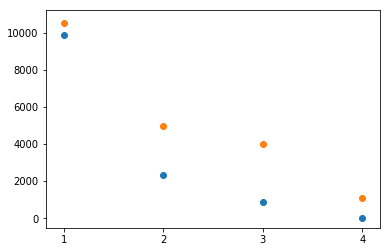

In [47]:
plt.scatter(x=['1','2','3','4'],y=y_test_long.TTF_.value_counts())
plt.scatter(x=['1','2','3','4'],y=y.TTF_.value_counts())

# Preparing train and val data

In [48]:
# leaving last 3013 items (it's 14 assets) for validation
idx = data.shape[0]-3013
idx

17618

In [49]:
data.iloc[:idx,:][['asset','cycle']].tail(2),data.iloc[idx:,:][['asset','cycle']].head(2)

(       asset  cycle
 17616     86    277
 17617     86    278,        asset  cycle
 17618     87      1
 17619     87      2)

In [50]:
data.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [51]:
data[['setting1','setting2']].head()

,setting1,setting2
0,-0.0007,-0.0004
1,0.0019,-0.0003
2,-0.0043,0.0003
3,0.0007,0.0000
4,-0.0019,-0.0002


In [52]:
data_train = data.iloc[:idx,:]
data_val = data.iloc[idx:,:]
y_train = y[:idx]
y_val = y[idx:]

In [53]:
y_test_long.head()

,TTF,TTF_
0,142.0,more100
1,141.0,more100
2,140.0,more100
3,139.0,more100
4,138.0,more100


In [54]:
data_train.shape,y_train.shape,data_val.shape,y_val.shape

((17618, 19), (17618, 2), (3013, 19), (3013, 2))

In [55]:
data_train.shape,data_test.shape

((17618, 19), (13096, 19))

In [56]:
print(len(y_train),len(y_test),len(y_val))
print(data_train.shape,data_test.shape,data_val.shape)

17618 100 3013
(17618, 19) (13096, 19) (3013, 19)


In [57]:
data_train.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [58]:
def plot_param(param):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(data_train[param],label='train',normed=True);
    plt.hist(data_val[param],label='val',normed=True,alpha = 0.5);
    plt.legend()
    plt.subplot(1,2,2)
    plt.hist(data_train[param],label='train',normed=True);
    plt.hist(data_test[param],label='test',normed=True,alpha = 0.5);
    plt.legend()

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


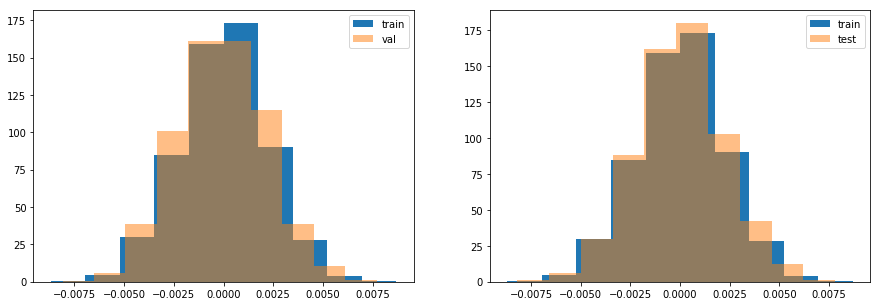

In [59]:
plot_param('setting1')

In [60]:
rng1=None
rng2=slice(2, None)
data_train=data_train.iloc[:rng1,rng2]
data_val=data_val.iloc[:rng1,rng2]
data_test=data_test.iloc[:rng1,rng2]
y_train=y_train[:rng1]
y_val=y_val[:rng1]
y_test_long=y_test_long[:rng1]

In [61]:
#data_train.head(),data_val.head(),data_test.head()

In [62]:
data_train.shape

(17618, 17)

In [63]:
data_train.head()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


# Checking if the test data comes from the same distribution

Trying to predict test data to find out if it's from a different distribution

In [64]:
data.shape, data_test.shape

((20631, 19), (13096, 17))

In [65]:
data.iloc[13091:13095,:]

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
13091,66,175,-0.0020,-0.0002,643.30,1600.35,1423.58,21.61,552.57,2388.19,9066.12,48.04,519.96,2388.19,8142.13,8.5161,393,38.53,23.1516
13092,66,176,0.0027,-0.0004,643.46,1597.68,1420.84,21.61,552.13,2388.23,9069.49,48.02,520.85,2388.20,8144.80,8.4722,394,38.58,23.1050
13093,66,177,0.0011,0.0002,643.42,1604.56,1419.93,21.61,551.87,2388.21,9072.37,47.93,519.71,2388.20,8143.68,8.5005,395,38.53,23.0751
13094,66,178,0.0023,0.0004,643.72,1595.63,1421.71,21.61,551.96,2388.21,9066.94,48.08,520.44,2388.20,8149.60,8.4975,395,38.61,23.2215


In [66]:
data_test.tail()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
13091,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699
13095,0.0013,0.0003,642.95,1601.62,1424.99,21.61,552.48,2388.06,9155.03,47.80,521.07,2388.05,8214.64,8.4903,396,38.70,23.1855


In [67]:
data_full = pd.concat([data_train,data_val,data_test]).reset_index(drop=True)

In [68]:
data_full.head()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [69]:
data_full.shape

(33727, 17)

In [70]:
y_full = np.zeros(data_full.shape[0])

In [71]:
train_limit = 5000
data_full_train = pd.concat([data_full[:train_limit],data_full[-train_limit:]])
data_full_test = data_full[train_limit:-train_limit]

In [72]:
type(y_full)

numpy.ndarray

In [73]:
y_full[:data.shape[0]]=0
y_full[data.shape[0]:]=1
y_full_train = np.concatenate([y_full[:train_limit],y_full[-train_limit:]])
y_full_test = y_full[train_limit:-train_limit]

In [74]:
data_full.shape, data_full_train.shape,data_full_test.shape, y_full_train.shape, y_full_test.shape

((33727, 17), (10000, 17), (23727, 17), (10000,), (23727,))

In [75]:
np.sum(y_full),np.sum(y_full_train),np.sum(y_full_test)

(13096.0, 5000.0, 8096.0)

In [76]:
from sklearn.linear_model import LogisticRegression
lr_findtest = LogisticRegression(random_state=random_state, solver='lbfgs', multi_class='multinomial', max_iter=100)
lr_findtest.fit(data_full_train,y_full_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
lr_findtest.score(data_full_train,y_full_train),lr_findtest.score(data_full_test,y_full_test)

(0.5811, 0.593416782568382)

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt_findtest = DecisionTreeClassifier(random_state=random_state)
dt_findtest.fit(data_full_train,y_full_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [79]:
dt_findtest.score(data_full_train,y_full_train),dt_findtest.score(data_full_test,y_full_test)

(1.0, 0.5225270788553125)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_findtest = RandomForestClassifier(random_state=random_state)
rf_findtest.fit(data_full_train,y_full_train)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [81]:
rf_findtest.score(data_full_train,y_full_train),rf_findtest.score(data_full_test,y_full_test)

(0.9844, 0.5561596493446285)

In [82]:
rf_findtest_predict = rf_findtest.predict(data_full_test)

In [83]:
pd.crosstab(y_full_test, rf_findtest_predict)

col_0,0.0,1.0
row_0,,
0.0,9338,6293
1.0,4238,3858


In [84]:
from xgboost import XGBClassifier
xgb_findtest = XGBClassifier(random_state=random_state)
#eval_set=[(data_train.iloc[:,2:], y_train.TTF_), (data_test.iloc[:,2:], y_test_long.TTF_)],
#early_stopping_rounds=50,  verbose=False
xgb_findtest.fit(data_full_train,y_full_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
xgb_findtest.score(data_full_train,y_full_train),xgb_findtest.score(data_full_test,y_full_test)

(0.6754, 0.537151768027985)

In [86]:
xgb_findtest_predict = xgb_findtest.predict(data_full_test)

In [87]:
y_full_test[:15]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [88]:
pd.crosstab(y_full_test, xgb_findtest_predict)

col_0,0.0,1.0
row_0,,
0.0,7200,8431
1.0,2551,5545


In [89]:
y_train.TTF.values,y_test_long.TTF.values

(array([191, 190, 189, ...,   2,   1,   0], dtype=int64),
 array([142., 141., 140., ...,  22.,  21.,  20.]))

Apparently, test data comes from approx. the same distribustion as train / val (since we can't confidently predict if a sample comes from train or test)

# Only leaving n columns (optional)

In [90]:
columns_to_keep = ['sensor11','sensor4','sensor12','sensor9']

In [91]:
data_train.head()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [92]:
data_train = data_train[columns_to_keep]
data_val = data_val[columns_to_keep]
data_test = data_test[columns_to_keep]

In [93]:
data_test.head()

,sensor11,sensor4,sensor12,sensor9
0,47.20,1398.21,521.72,9050.17
1,47.50,1395.42,522.16,9054.42
2,47.50,1401.34,521.97,9056.96
3,47.28,1406.42,521.38,9045.29
4,47.31,1401.92,522.15,9044.55


# Models

In [94]:
# list with the results of all models
# values are: 
# results_list.append(['lr',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
#cv_score.round(3),[conf_train_pct,conf_val_pct,conf_test_pct],\
#                    [scores_train, scores_val,scores_test]])
results_list = []

In [95]:
#cv = 5
cv = TimeSeriesSplit(n_splits=5)

In [96]:
def get_predicts(clf,data):
    return clf.predict(data)
def get_predicts_proba(clf,data):
    return clf.predict_proba(data).round(3)

In [97]:
from sklearn.metrics import f1_score,accuracy_score, roc_auc_score,confusion_matrix

In [98]:
def get_confmatrix(gt,pred):
    conf_matrix = confusion_matrix(gt,pred,labels=['less10','10to50','50to100','more100'])
    print('Pct / Total / Diagonal: ', np.round(np.trace(conf_matrix)/np.sum(conf_matrix)*100,2),\
          np.sum(conf_matrix),np.trace(conf_matrix))
    print('Upper triangle sum (overestimating): ',conf_matrix[0][1:].sum(),conf_matrix[1][2:].sum(),conf_matrix[2][3:].sum(),\
         conf_matrix[0][1:].sum()+conf_matrix[1][2:].sum()+conf_matrix[2][3:].sum())
    print('Lower triangle sum (underestimating): ',conf_matrix[1][:1].sum(),conf_matrix[2][:2].sum(),conf_matrix[3][:3].sum(),\
         conf_matrix[1][:1].sum()+conf_matrix[2][:2].sum()+conf_matrix[3][:3].sum())
    print('less10','10to50','50to100','more100')
    print(conf_matrix)
    return conf_matrix

In [99]:
# returns [f1_score micro,f1_score macro,f1_score weighted,accuracy]
def get_scores(gt,pred):
    return [f1_score(gt,pred,average='micro').round(3),f1_score(gt,pred,average='macro').round(3),\
f1_score(gt,pred,average='weighted').round(3),accuracy_score(gt,pred).round(3),\
           precision_score(gt,pred,average='micro').round(3),precision_score(gt,pred,average='macro').round(3),\
            precision_score(gt,pred,average='weighted').round(3), recall_score(gt,pred,average='micro').round(3),\
            recall_score(gt,pred,average='macro').round(3), recall_score(gt,pred,average='weighted').round(3)]

## Logistic Regression

Have to scale the data - shouldn't work like this

In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=random_state, solver='lbfgs', multi_class='multinomial', max_iter=100)
lr.fit(data_train,y_train.TTF_)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
cv_score_train = cross_val_score(lr,data_train,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\log

(0.644, array([0.616, 0.611, 0.643, 0.637, 0.712]))

In [102]:
cv_score_val = cross_val_score(lr,data_val,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\log

(0.617, array([0.556, 0.598, 0.677, 0.677, 0.576]))

In [103]:
cv_score_test = cross_val_score(lr,data_test,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(0.766, array([0.796, 0.725, 0.764, 0.765, 0.778]))

In [104]:
predict_lr_train = get_predicts(lr,data_train)
predict_lr_val = get_predicts(lr,data_val)
predict_lr_test = get_predicts(lr,data_test)

In [105]:
conf_train = get_confmatrix(y_train['TTF_'],predict_lr_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_lr_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_lr_test)
#tn_train,fp_train,fn_train,tp_train = conf_train.ravel()

Pct / Total / Diagonal:  63.39 17618 11168
Upper triangle sum (overestimating):  552 1080 3635 5267
Lower triangle sum (underestimating):  351 665 167 1183
less10 10to50 50to100 more100
[[ 394  545    6    1]
 [ 351 2009  118  962]
 [  13  652    0 3635]
 [   1  166    0 8765]]
Pct / Total / Diagonal:  65.95 3013 1987
Upper triangle sum (overestimating):  80 184 606 870
Lower triangle sum (underestimating):  42 94 20 156
less10 10to50 50to100 more100
[[  74   80    0    0]
 [  42  334   13  171]
 [   0   94    0  606]
 [   0   20    0 1579]]
Pct / Total / Diagonal:  77.83 13096 10193
Upper triangle sum (overestimating):  8 411 2089 2508
Lower triangle sum (underestimating):  38 219 138 395
less10 10to50 50to100 more100
[[   9    8    0    0]
 [  38  420   18  393]
 [   6  213    0 2089]
 [   1  137    0 9764]]


In [106]:
scores_train = get_scores(y_train['TTF_'],predict_lr_train)
scores_val = get_scores(y_val['TTF_'],predict_lr_val)
scores_test = get_scores(y_test_long['TTF_'],predict_lr_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.634, 0.46, 0.539, 0.634, 0.634, 0.443, 0.477, 0.634, 0.495, 0.634]
[0.659, 0.49, 0.566, 0.659, 0.659, 0.485, 0.506, 0.659, 0.516, 0.659]
[0.778, 0.411, 0.701, 0.778, 0.778, 0.376, 0.639, 0.778, 0.5, 0.778]


In [107]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
#results_list.append(['lr',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
#                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
#                    [scores_train, scores_val,scores_test]])

## Logistic Regression Scaled

In [108]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()
data_train_scaled = data_scaler.fit_transform(data_train)
data_val_scaled = data_scaler.transform(data_val)
data_test_scaled = data_scaler.transform(data_test)

lr_scaled = LogisticRegression(random_state=random_state, solver='lbfgs', multi_class='multinomial', max_iter=100)
lr_scaled.fit(data_train_scaled,y_train.TTF_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
cv_score_train = cross_val_score(lr_scaled,data_train_scaled,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.709, array([0.681, 0.7  , 0.774, 0.66 , 0.732]))

In [110]:
cv_score_val = cross_val_score(lr_scaled,data_val_scaled,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.692, array([0.624, 0.588, 0.831, 0.775, 0.645]))

In [111]:
cv_score_test = cross_val_score(lr_scaled,data_test_scaled,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.791, array([0.816, 0.711, 0.801, 0.835, 0.789]))

In [112]:
predict_lr_train = get_predicts(lr_scaled,data_train_scaled)
predict_lr_val = get_predicts(lr_scaled,data_val_scaled)
predict_lr_test = get_predicts(lr_scaled,data_test_scaled)

In [113]:
conf_train = get_confmatrix(y_train['TTF_'],predict_lr_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_lr_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_lr_test)
#tn_train,fp_train,fn_train,tp_train = conf_train.ravel()

Pct / Total / Diagonal:  73.63 17618 12972
Upper triangle sum (overestimating):  227 724 2000 2951
Lower triangle sum (underestimating):  176 585 934 1695
less10 10to50 50to100 more100
[[ 719  226    1    0]
 [ 176 2540  547  177]
 [   0  585 1715 2000]
 [   0   53  881 7998]]
Pct / Total / Diagonal:  74.84 3013 2255
Upper triangle sum (overestimating):  34 138 297 469
Lower triangle sum (underestimating):  32 109 148 289
less10 10to50 50to100 more100
[[ 120   34    0    0]
 [  32  390  108   30]
 [   0  109  294  297]
 [   0    5  143 1451]]
Pct / Total / Diagonal:  81.4 13096 10660
Upper triangle sum (overestimating):  6 329 1320 1655
Lower triangle sum (underestimating):  12 151 618 781
less10 10to50 50to100 more100
[[  11    6    0    0]
 [  12  528  204  125]
 [   0  151  837 1320]
 [   0   39  579 9284]]


In [114]:
scores_train = get_scores(y_train['TTF_'],predict_lr_train)
scores_val = get_scores(y_val['TTF_'],predict_lr_val)
scores_test = get_scores(y_test_long['TTF_'],predict_lr_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.736, 0.705, 0.724, 0.736, 0.736, 0.72, 0.72, 0.736, 0.698, 0.736]
[0.748, 0.707, 0.738, 0.748, 0.748, 0.717, 0.734, 0.748, 0.701, 0.748]
[0.814, 0.635, 0.8, 0.814, 0.814, 0.647, 0.794, 0.814, 0.639, 0.814]


In [115]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['lr_scaled',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
                    [scores_train, scores_val,scores_test]])

## Logistic Regression GridSearch

In [116]:
from sklearn.model_selection import GridSearchCV
lr_Grid = LogisticRegression(random_state=random_state, solver='lbfgs', multi_class='multinomial', max_iter=100)
#lr_tuned.fit(data_train_scaled,y_train.TTF_)

In [117]:
param_grid = {
    'C': np.logspace(-3, 3, 5), # также можно указать обычный массив, [1, 2, 3, 4]
    'penalty': ['l2'] # 'l1', 
}
search = GridSearchCV(lr_Grid, param_grid, n_jobs=-1, cv=cv, refit=True, scoring='f1_micro')

In [118]:
search.fit(data_train_scaled, y_train.TTF_)

# выведем наилучшие параметры
print(search.best_params_)

{'C': 0.03162277660168379, 'penalty': 'l2'}


In [119]:
cv_score_train = cross_val_score(search,data_train_scaled,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.712, array([0.681, 0.699, 0.773, 0.672, 0.735]))

In [120]:
cv_score_val = cross_val_score(search,data_val_scaled,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.688, array([0.62 , 0.58 , 0.831, 0.771, 0.639]))

In [121]:
cv_score_test = cross_val_score(search,data_test_scaled,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(0.791, array([0.824, 0.708, 0.8  , 0.836, 0.788]))

In [122]:
predict_lr_train = get_predicts(search,data_train_scaled)
predict_lr_val = get_predicts(search,data_val_scaled)
predict_lr_test = get_predicts(search,data_test_scaled)

In [123]:
conf_train = get_confmatrix(y_train['TTF_'],predict_lr_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_lr_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_lr_test)
#tn_train,fp_train,fn_train,tp_train = conf_train.ravel()

Pct / Total / Diagonal:  73.7 17618 12984
Upper triangle sum (overestimating):  252 731 2065 3048
Lower triangle sum (underestimating):  153 577 856 1586
less10 10to50 50to100 more100
[[ 694  251    1    0]
 [ 153 2556  546  185]
 [   0  577 1658 2065]
 [   0   51  805 8076]]
Pct / Total / Diagonal:  74.74 3013 2252
Upper triangle sum (overestimating):  41 138 309 488
Lower triangle sum (underestimating):  31 106 136 273
less10 10to50 50to100 more100
[[ 113   41    0    0]
 [  31  391  106   32]
 [   0  106  285  309]
 [   0    4  132 1463]]
Pct / Total / Diagonal:  81.55 13096 10680
Upper triangle sum (overestimating):  9 326 1349 1684
Lower triangle sum (underestimating):  11 152 569 732
less10 10to50 50to100 more100
[[   8    9    0    0]
 [  11  532  198  128]
 [   0  152  807 1349]
 [   0   39  530 9333]]


In [124]:
scores_train = get_scores(y_train['TTF_'],predict_lr_train)
scores_val = get_scores(y_val['TTF_'],predict_lr_val)
scores_test = get_scores(y_test_long['TTF_'],predict_lr_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.737, 0.703, 0.723, 0.737, 0.737, 0.724, 0.72, 0.737, 0.692, 0.737]
[0.747, 0.698, 0.735, 0.747, 0.747, 0.716, 0.731, 0.747, 0.689, 0.747]
[0.816, 0.608, 0.8, 0.816, 0.816, 0.634, 0.794, 0.816, 0.594, 0.816]


In [125]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['lr_Grid',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
                    [scores_train, scores_val,scores_test]])

## DT

In [126]:
data_train.head()

,sensor11,sensor4,sensor12,sensor9
0,47.47,1400.60,521.66,9046.19
1,47.49,1403.14,522.28,9044.07
2,47.27,1404.20,522.42,9052.94
3,47.13,1401.87,522.86,9049.48
4,47.28,1406.22,522.19,9055.15


In [127]:
data_val.head()

,sensor11,sensor4,sensor12,sensor9
17618,47.36,1404.23,522.07,9060.45
17619,47.44,1411.71,521.81,9065.16
17620,47.35,1399.03,522.07,9064.45
17621,47.28,1397.49,521.97,9059.79
17622,47.35,1405.60,522.13,9060.30


In [128]:
data_test.head()

,sensor11,sensor4,sensor12,sensor9
0,47.20,1398.21,521.72,9050.17
1,47.50,1395.42,522.16,9054.42
2,47.50,1401.34,521.97,9056.96
3,47.28,1406.42,521.38,9045.29
4,47.31,1401.92,522.15,9044.55


In [129]:
y_train[:5]

,TTF,TTF_
0,191,more100
1,190,more100
2,189,more100
3,188,more100
4,187,more100


In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=random_state)
dt.fit(data_train,y_train.TTF_)
#cross_val_score(clf, iris.data, iris.target, cv=10)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [131]:
cv_score_train = cross_val_score(dt,data_train,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.64, array([0.646, 0.631, 0.675, 0.6  , 0.646]))

In [132]:
cv_score_val = cross_val_score(dt,data_val,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.623, array([0.57 , 0.578, 0.733, 0.663, 0.57 ]))

In [133]:
cv_score_test = cross_val_score(dt,data_test,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.719, array([0.747, 0.651, 0.756, 0.731, 0.709]))

In [134]:
predict_dt_train = get_predicts(dt,data_train)
predict_dt_val = get_predicts(dt,data_val)
predict_dt_test = get_predicts(dt,data_test)

In [135]:
conf_train = get_confmatrix(y_train['TTF_'],predict_dt_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_dt_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_dt_test)

Pct / Total / Diagonal:  100.0 17618 17618
Upper triangle sum (overestimating):  0 0 0 0
Lower triangle sum (underestimating):  0 0 0 0
less10 10to50 50to100 more100
[[ 946    0    0    0]
 [   0 3440    0    0]
 [   0    0 4300    0]
 [   0    0    0 8932]]
Pct / Total / Diagonal:  65.75 3013 1981
Upper triangle sum (overestimating):  50 165 273 488
Lower triangle sum (underestimating):  38 116 390 544
less10 10to50 50to100 more100
[[ 104   50    0    0]
 [  38  357  105   60]
 [   0  116  311  273]
 [   0   39  351 1209]]
Pct / Total / Diagonal:  70.42 13096 9222
Upper triangle sum (overestimating):  8 369 1161 1538
Lower triangle sum (underestimating):  27 251 2058 2336
less10 10to50 50to100 more100
[[   9    7    1    0]
 [  27  473  243  126]
 [   0  251  896 1161]
 [   0  188 1870 7844]]


In [136]:
scores_train = get_scores(y_train['TTF_'],predict_dt_train)
scores_val = get_scores(y_val['TTF_'],predict_dt_val)
scores_test = get_scores(y_test_long['TTF_'],predict_dt_test)
print(scores_train)
print(scores_val)
print(scores_test)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.657, 0.633, 0.661, 0.657, 0.657, 0.639, 0.666, 0.657, 0.628, 0.657]
[0.704, 0.507, 0.718, 0.704, 0.704, 0.48, 0.736, 0.704, 0.564, 0.704]


In [137]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
#results_list.append(['dt',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
#                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
#                    [scores_train, scores_val,scores_test]])

## RandomForest

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=random_state) # , n_estimators=10, min_samples_leaf=5, max_depth=25
rf.fit(data_train,y_train.TTF_)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [139]:
cv_score_train = cross_val_score(rf,data_train,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.682, array([0.662, 0.685, 0.725, 0.634, 0.706]))

In [140]:
cv_score_val = cross_val_score(rf,data_val,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.659, array([0.592, 0.564, 0.783, 0.745, 0.61 ]))

In [141]:
cv_score_test = cross_val_score(rf,data_test,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.765, array([0.79 , 0.679, 0.799, 0.79 , 0.769]))

In [142]:
predict_rf_train = get_predicts(rf,data_train)
predict_rf_val = get_predicts(rf,data_val)
predict_rf_test = get_predicts(rf,data_test)

In [143]:
conf_train = get_confmatrix(y_train['TTF_'],predict_rf_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_rf_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_rf_test)

Pct / Total / Diagonal:  98.71 17618 17390
Upper triangle sum (overestimating):  23 23 63 109
Lower triangle sum (underestimating):  6 50 63 119
less10 10to50 50to100 more100
[[ 923   23    0    0]
 [   6 3411   14    9]
 [   0   50 4187   63]
 [   0    7   56 8869]]
Pct / Total / Diagonal:  69.3 3013 2088
Upper triangle sum (overestimating):  44 159 319 522
Lower triangle sum (underestimating):  27 100 276 403
less10 10to50 50to100 more100
[[ 110   43    1    0]
 [  27  374  106   53]
 [   0  100  281  319]
 [   0   11  265 1323]]
Pct / Total / Diagonal:  77.39 13096 10135
Upper triangle sum (overestimating):  9 336 1217 1562
Lower triangle sum (underestimating):  15 194 1190 1399
less10 10to50 50to100 more100
[[   8    9    0    0]
 [  15  518  220  116]
 [   0  194  897 1217]
 [   0   70 1120 8712]]


In [144]:
scores_train = get_scores(y_train['TTF_'],predict_rf_train)
scores_val = get_scores(y_val['TTF_'],predict_rf_val)
scores_test = get_scores(y_test_long['TTF_'],predict_rf_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.987, 0.985, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.983, 0.987]
[0.693, 0.666, 0.689, 0.693, 0.693, 0.681, 0.687, 0.693, 0.653, 0.693]
[0.774, 0.573, 0.772, 0.774, 0.774, 0.568, 0.77, 0.774, 0.584, 0.774]


In [145]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
#results_list.append(['rf',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
#                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
#                    [scores_train, scores_val,scores_test]])

In [146]:
rf.classes_

array(['10to50', '50to100', 'less10', 'more100'], dtype=object)

## RandomForest GridSearch

In [147]:
[int(x) for x in np.linspace(start = 10, stop = 200, num = 5)],[int(x) for x in np.logspace(start = 2, stop = 3, num = 4)]

([10, 57, 105, 152, 200], [100, 215, 464, 1000])

In [148]:
# Create the random grid
param_grid = {'n_estimators': [200, 300, 500],
               #'max_features': ['auto', 'sqrt'],
               'max_depth': [5, 7] + [None],
               'min_samples_split': [13,17],
               'min_samples_leaf': [6,8],
               'bootstrap': [True, False]}

In [149]:
rf_Grid = RandomForestClassifier(random_state=random_state)
search = GridSearchCV(rf_Grid, param_grid, n_jobs=-1, cv=cv, refit=True, scoring='f1_micro', verbose=True)

In [150]:
filename = 'rf_GridSearch.pkl'
#outfile = open(filename,'wb')
#pickle.dump(search,outfile)
#outfile.close()
infile = open(filename,'rb')
search = pickle.load(infile)
infile.close()

#search.fit(data_train_scaled, y_train.TTF_)
print(search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 13, 'n_estimators': 500}


In [151]:
rf_Grid = RandomForestClassifier(random_state=random_state, bootstrap = search.best_params_['bootstrap'],\
            min_samples_split = search.best_params_['min_samples_split'], max_depth = search.best_params_['max_depth'],\
            min_samples_leaf = search.best_params_['min_samples_leaf'], n_estimators = search.best_params_['n_estimators'])
rf_Grid.fit(data_train,y_train.TTF_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [152]:
cv_score_train = cross_val_score(rf_Grid,data_train,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.73, array([0.698, 0.713, 0.781, 0.712, 0.748]))

In [153]:
cv_score_val = cross_val_score(rf_Grid,data_val,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.678, array([0.614, 0.564, 0.805, 0.787, 0.624]))

In [154]:
cv_score_test = cross_val_score(rf_Grid,data_test,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.787, array([0.8  , 0.715, 0.798, 0.812, 0.809]))

In [155]:
predict_rf_train = get_predicts(rf_Grid,data_train)
predict_rf_val = get_predicts(rf_Grid,data_val)
predict_rf_test = get_predicts(rf_Grid,data_test)

In [156]:
conf_train = get_confmatrix(y_train['TTF_'],predict_rf_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_rf_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_rf_test)

Pct / Total / Diagonal:  75.46 17618 13295
Upper triangle sum (overestimating):  260 671 2266 3197
Lower triangle sum (underestimating):  142 497 487 1126
less10 10to50 50to100 more100
[[ 686  260    0    0]
 [ 142 2627  437  234]
 [   0  497 1537 2266]
 [   0   38  449 8445]]
Pct / Total / Diagonal:  74.28 3013 2238
Upper triangle sum (overestimating):  47 145 384 576
Lower triangle sum (underestimating):  18 86 95 199
less10 10to50 50to100 more100
[[ 107   47    0    0]
 [  18  397   82   63]
 [   0   86  230  384]
 [   0    3   92 1504]]
Pct / Total / Diagonal:  82.09 13096 10751
Upper triangle sum (overestimating):  8 344 1531 1883
Lower triangle sum (underestimating):  10 144 308 462
less10 10to50 50to100 more100
[[   9    8    0    0]
 [  10  515  204  140]
 [   0  144  633 1531]
 [   0   35  273 9594]]


In [157]:
scores_train = get_scores(y_train['TTF_'],predict_rf_train)
scores_val = get_scores(y_val['TTF_'],predict_rf_val)
scores_test = get_scores(y_test_long['TTF_'],predict_rf_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.755, 0.712, 0.733, 0.755, 0.755, 0.751, 0.74, 0.755, 0.698, 0.755]
[0.743, 0.689, 0.721, 0.743, 0.743, 0.735, 0.724, 0.743, 0.668, 0.743]
[0.821, 0.608, 0.795, 0.821, 0.821, 0.657, 0.794, 0.821, 0.591, 0.821]


In [158]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['rf_Grid',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
                    [scores_train, scores_val,scores_test]])

In [159]:
rf_Grid.classes_

array(['10to50', '50to100', 'less10', 'more100'], dtype=object)

## RandomForest Hyperopt

In [160]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval

In [161]:
hp.choice('max_depth', range(1,20))

In [162]:
from sklearn.model_selection import cross_val_score

param_space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
   # 'max_features': hp.choice('max_features', range(1,150)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'min_samples_split': hp.choice('min_samples_split', [10, 13, 17, 20]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [4, 6, 8, 10])}
#               'min_samples_split': [13,17],
#               'min_samples_leaf': [6,8],

best = 0
def f(params):
    global best
    clf = RandomForestClassifier(**params, random_state=random_state)
    #acc = cross_val_score(clf, data_train, y_train.TTF_, cv=cv).mean()
    scores = cross_val_score(clf, data_train, y_train.TTF_, cv=cv, scoring='f1_micro', n_jobs=-1)
    
    if scores.mean() > best:
        best = scores.mean()
        print ('new best:', best, params)

    # Extract the best score
    best_score = scores.mean()

    # Loss must be minimized
    loss = 1 - best_score
    return {'loss': loss, 'status': STATUS_OK}

#trials = Trials()
#best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)

#filename = 'rf_Hyperopt_best.pkl'
#outfile = open(filename,'wb')
#pickle.dump(best,outfile)
#outfile.close()
#filename = 'rf_Hyperopt_trials.pkl'
#outfile = open(filename,'wb')
#pickle.dump(trials,outfile)
#outfile.close()

filename = 'rf_Hyperopt_best.pkl'
infile = open(filename,'rb')
best = pickle.load(infile)
infile.close()
filename = 'rf_Hyperopt_trials.pkl'
infile = open(filename,'rb')
trials = pickle.load(infile)
infile.close()

print ('best:')
print (best)

best:
{'criterion': 1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 0, 'n_estimators': 267}


In [163]:
best

{'criterion': 1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 0,
 'n_estimators': 267}

In [164]:
space_eval(param_space, best)['criterion']

'entropy'

In [165]:
rf_HyperO = RandomForestClassifier(random_state=random_state, \
            criterion = space_eval(param_space, best)['criterion'],\
            max_depth = space_eval(param_space, best)['max_depth'],\
            min_samples_leaf = space_eval(param_space, best)['min_samples_leaf'],\
            min_samples_split = space_eval(param_space, best)['min_samples_split'],
            n_estimators = space_eval(param_space, best)['n_estimators']) # , n_estimators=10, min_samples_leaf=5, max_depth=25
rf_HyperO.fit(data_train,y_train.TTF_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=367,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [166]:
cv_score_train = cross_val_score(rf_HyperO,data_train,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.735, array([0.713, 0.708, 0.784, 0.72 , 0.751]))

In [167]:
cv_score_val = cross_val_score(rf_HyperO,data_val,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.684, array([0.616, 0.574, 0.817, 0.795, 0.618]))

In [168]:
cv_score_test = cross_val_score(rf_HyperO,data_test,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.789, array([0.799, 0.717, 0.804, 0.819, 0.807]))

In [169]:
predict_rf_train = get_predicts(rf_HyperO,data_train)
predict_rf_val = get_predicts(rf_HyperO,data_val)
predict_rf_test = get_predicts(rf_HyperO,data_test)

In [170]:
conf_train = get_confmatrix(y_train['TTF_'],predict_rf_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_rf_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_rf_test)

Pct / Total / Diagonal:  76.05 17618 13398
Upper triangle sum (overestimating):  220 718 2277 3215
Lower triangle sum (underestimating):  144 415 446 1005
less10 10to50 50to100 more100
[[ 726  220    0    0]
 [ 144 2578  490  228]
 [   0  415 1608 2277]
 [   0   18  428 8486]]
Pct / Total / Diagonal:  74.84 3013 2255
Upper triangle sum (overestimating):  37 155 383 575
Lower triangle sum (underestimating):  20 81 82 183
less10 10to50 50to100 more100
[[ 117   37    0    0]
 [  20  385   92   63]
 [   0   81  236  383]
 [   0    2   80 1517]]
Pct / Total / Diagonal:  82.09 13096 10751
Upper triangle sum (overestimating):  7 366 1549 1922
Lower triangle sum (underestimating):  10 120 293 423
less10 10to50 50to100 more100
[[  10    7    0    0]
 [  10  493  228  138]
 [   0  120  639 1549]
 [   0   22  271 9609]]


In [171]:
scores_train = get_scores(y_train['TTF_'],predict_rf_train)
scores_val = get_scores(y_val['TTF_'],predict_rf_val)
scores_test = get_scores(y_test_long['TTF_'],predict_rf_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.76, 0.724, 0.741, 0.76, 0.76, 0.76, 0.747, 0.76, 0.71, 0.76]
[0.748, 0.701, 0.726, 0.748, 0.748, 0.742, 0.73, 0.748, 0.683, 0.748]
[0.821, 0.618, 0.795, 0.821, 0.821, 0.67, 0.794, 0.821, 0.601, 0.821]


In [172]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['rf_HyperO',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
                    [scores_train, scores_val,scores_test]])

In [173]:
rf.classes_

array(['10to50', '50to100', 'less10', 'more100'], dtype=object)

## XGB

In [174]:
#np.unique(y.TTF_)

In [175]:
#from sklearn.utils import class_weight
#class_weights = list(class_weight.compute_class_weight('balanced',
#                                             np.unique(y.TTF_),
#                                             y.TTF_))

#w_array = np.ones(y.TTF_.shape[0], dtype = 'float')
#for i, val in enumerate(y.TTF_):
#    w_array[i] = class_weights[val-1]

In [176]:
from xgboost import XGBClassifier
from xgboost import plot_importance
xgb = XGBClassifier(random_state=random_state)
#eval_set=[(data_train.iloc[:,2:], y_train.TTF_), (data_test.iloc[:,2:], y_test_long.TTF_)],
#early_stopping_rounds=50,  verbose=False
xgb.fit(data_train, y_train.TTF_) # , sample_weight=w_array

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [177]:
cv_score_train = cross_val_score(xgb,data_train,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.732, array([0.705, 0.709, 0.78 , 0.715, 0.753]))

In [178]:
cv_score_val = cross_val_score(xgb,data_val,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.692, array([0.602, 0.643, 0.791, 0.799, 0.625]))

In [179]:
cv_score_test = cross_val_score(xgb,data_test,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.79, array([0.799, 0.717, 0.808, 0.824, 0.804]))

In [180]:
predict_xgb_train = get_predicts(xgb,data_train)
predict_xgb_val = get_predicts(xgb,data_val)
predict_xgb_test = get_predicts(xgb,data_test)

In [181]:
predict_proba_xgb_train = get_predicts_proba(xgb,data_train)
predict_proba_xgb_val = get_predicts_proba(xgb,data_val)
predict_proba_xgb_test = get_predicts_proba(xgb,data_test)

In [182]:
conf_train = get_confmatrix(y_train['TTF_'],predict_xgb_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_xgb_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_xgb_test)

Pct / Total / Diagonal:  76.5 17618 13477
Upper triangle sum (overestimating):  204 682 2138 3024
Lower triangle sum (underestimating):  145 431 541 1117
less10 10to50 50to100 more100
[[ 742  204    0    0]
 [ 145 2613  465  217]
 [   0  431 1731 2138]
 [   0   30  511 8391]]
Pct / Total / Diagonal:  74.81 3013 2254
Upper triangle sum (overestimating):  36 155 356 547
Lower triangle sum (underestimating):  23 86 103 212
less10 10to50 50to100 more100
[[ 118   36    0    0]
 [  23  382   96   59]
 [   0   86  258  356]
 [   0    1  102 1496]]
Pct / Total / Diagonal:  82.35 13096 10784
Upper triangle sum (overestimating):  8 349 1460 1817
Lower triangle sum (underestimating):  12 141 342 495
less10 10to50 50to100 more100
[[   9    8    0    0]
 [  12  508  210  139]
 [   0  141  707 1460]
 [   0   33  309 9560]]


In [183]:
xgb.classes_

array(['10to50', '50to100', 'less10', 'more100'], dtype=object)

In [184]:
print(y_test_long['TTF_'][2907:2920].values)
print(predict_xgb_test[2907:2920])
print(predict_proba_xgb_test[2907:2920])

['10to50' '10to50' '10to50' '10to50' '10to50' '10to50' '10to50' '10to50'
 '10to50' '10to50' '10to50' '10to50' '10to50']
['50to100' '50to100' '10to50' '10to50' '10to50' '10to50' '10to50' '10to50'
 '10to50' '10to50' '10to50' '10to50' '10to50']
[[0.407 0.577 0.003 0.014]
 [0.137 0.849 0.002 0.012]
 [0.834 0.157 0.001 0.008]
 [0.774 0.217 0.001 0.008]
 [0.732 0.259 0.002 0.007]
 [0.878 0.116 0.001 0.005]
 [0.796 0.196 0.001 0.007]
 [0.968 0.03  0.    0.002]
 [0.896 0.1   0.001 0.003]
 [0.979 0.019 0.    0.002]
 [0.972 0.025 0.    0.003]
 [0.979 0.019 0.001 0.002]
 [0.984 0.014 0.    0.001]]


### Trying the trick

In [185]:
predict_trick_xgb_train_tmp = [[x[2],x[2]+x[0],x[2]+x[0]+x[1],x[2]+x[0]+x[1]+x[3]] for x in predict_proba_xgb_train]
predict_trick_xgb_val_tmp = [[x[2],x[2]+x[0],x[2]+x[0]+x[1],x[2]+x[0]+x[1]+x[3]] for x in predict_proba_xgb_val]
predict_trick_xgb_test_tmp = [[x[2],x[2]+x[0],x[2]+x[0]+x[1],x[2]+x[0]+x[1]+x[3]] for x in predict_proba_xgb_test]

In [186]:
print(predict_trick_xgb_test_tmp[:3])

[[0.001, 0.003, 0.060999997, 1.001], [0.001, 0.004, 0.151, 1.0], [0.001, 0.0050000004, 0.211, 1.0]]


In [187]:
predict_trick_xgb_train = [np.argmax(np.array(x)>0.4) for x in predict_trick_xgb_train_tmp]
predict_trick_xgb_val = [np.argmax(np.array(x)>0.4) for x in predict_trick_xgb_val_tmp]
predict_trick_xgb_test = [np.argmax(np.array(x)>0.4) for x in predict_trick_xgb_test_tmp]

In [188]:
predict_trick_xgb_test[:5]

[3, 3, 3, 3, 3]

In [189]:
dic = {0:'less10', 1:'10to50', 2: '50to100', 3:'more100'}
predict_trick_xgb_train = [dic.get(n, n) for n in predict_trick_xgb_train]
predict_trick_xgb_val = [dic.get(n, n) for n in predict_trick_xgb_val]
predict_trick_xgb_test = [dic.get(n, n) for n in predict_trick_xgb_test]

In [190]:
predict_trick_xgb_test[:5]

['more100', 'more100', 'more100', 'more100', 'more100']

In [191]:
conf_train_trick = get_confmatrix(y_train['TTF_'],predict_trick_xgb_train)
conf_val_trick = get_confmatrix(y_val['TTF_'],predict_trick_xgb_val)
conf_test_trick = get_confmatrix(y_test_long['TTF_'],predict_trick_xgb_test)

Pct / Total / Diagonal:  74.86 17618 13189
Upper triangle sum (overestimating):  152 609 1529 2290
Lower triangle sum (underestimating):  205 558 1376 2139
less10 10to50 50to100 more100
[[ 794  152    0    0]
 [ 205 2626  526   83]
 [   0  558 2213 1529]
 [   0   39 1337 7556]]
Pct / Total / Diagonal:  72.95 3013 2198
Upper triangle sum (overestimating):  27 142 264 433
Lower triangle sum (underestimating):  33 102 247 382
less10 10to50 50to100 more100
[[ 127   27    0    0]
 [  33  385  119   23]
 [   0  102  334  264]
 [   0    4  243 1352]]
Pct / Total / Diagonal:  80.67 13096 10565
Upper triangle sum (overestimating):  7 299 1085 1391
Lower triangle sum (underestimating):  15 168 957 1140
less10 10to50 50to100 more100
[[  10    7    0    0]
 [  15  555  217   82]
 [   0  168 1055 1085]
 [   0   39  918 8945]]


In [192]:
scores_train = get_scores(y_train['TTF_'],predict_xgb_train)
scores_val = get_scores(y_val['TTF_'],predict_xgb_val)
scores_test = get_scores(y_test_long['TTF_'],predict_xgb_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.765, 0.734, 0.748, 0.765, 0.765, 0.763, 0.753, 0.765, 0.721, 0.765]
[0.748, 0.704, 0.73, 0.748, 0.748, 0.735, 0.73, 0.748, 0.688, 0.748]
[0.823, 0.608, 0.801, 0.823, 0.823, 0.65, 0.799, 0.823, 0.596, 0.823]


The trick doesn't seem to improve the accuracy, but we should check if it overestimates less

In [193]:
scores_train_trick = get_scores(y_train['TTF_'],predict_trick_xgb_train)
scores_val_trick = get_scores(y_val['TTF_'],predict_trick_xgb_val)
scores_test_trick = get_scores(y_test_long['TTF_'],predict_trick_xgb_test)
print(scores_train_trick)
print(scores_val_trick)
print(scores_test_trick)

[0.749, 0.738, 0.747, 0.749, 0.749, 0.735, 0.745, 0.749, 0.741, 0.749]
[0.73, 0.709, 0.728, 0.73, 0.73, 0.71, 0.728, 0.73, 0.709, 0.73]
[0.807, 0.629, 0.804, 0.807, 0.807, 0.622, 0.802, 0.807, 0.647, 0.807]


In [194]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['xgb',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
                    [scores_train, scores_val,scores_test]])
results_list.append(['xgb_trick',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train_trick,conf_val_trick,conf_test_trick],\
                    [scores_train_trick, scores_val_trick,scores_test_trick]])

In [195]:
#[0.793, 0.777, 0.78, 0.793]
#[0.756, 0.724, 0.742, 0.756]
#[0.833, 0.628, 0.814, 0.833]

In [196]:
data_test[:10]

,sensor11,sensor4,sensor12,sensor9
0,47.20,1398.21,521.72,9050.17
1,47.50,1395.42,522.16,9054.42
2,47.50,1401.34,521.97,9056.96
3,47.28,1406.42,521.38,9045.29
4,47.31,1401.92,522.15,9044.55
5,47.26,1395.13,521.92,9050.96
6,47.31,1404.84,522.01,9051.39
7,47.21,1400.89,522.09,9052.86
8,47.37,1412.28,522.03,9048.55
9,47.14,1398.64,522.00,9051.95


In [197]:
xgb.classes_

array(['10to50', '50to100', 'less10', 'more100'], dtype=object)

In [198]:
# use y_test_long['TTF_'][2400:2450],predict_xgb_test[2400:2450] to get a small but representative example
get_confmatrix(y_test_long['TTF_'],predict_xgb_test);

Pct / Total / Diagonal:  82.35 13096 10784
Upper triangle sum (overestimating):  8 349 1460 1817
Lower triangle sum (underestimating):  12 141 342 495
less10 10to50 50to100 more100
[[   9    8    0    0]
 [  12  508  210  139]
 [   0  141  707 1460]
 [   0   33  309 9560]]


In [199]:
get_confmatrix(y_test_long['TTF_'],predict_xgb_test);

Pct / Total / Diagonal:  82.35 13096 10784
Upper triangle sum (overestimating):  8 349 1460 1817
Lower triangle sum (underestimating):  12 141 342 495
less10 10to50 50to100 more100
[[   9    8    0    0]
 [  12  508  210  139]
 [   0  141  707 1460]
 [   0   33  309 9560]]


In [200]:
get_confmatrix(y_test_long['TTF_'],predict_trick_xgb_test);

Pct / Total / Diagonal:  80.67 13096 10565
Upper triangle sum (overestimating):  7 299 1085 1391
Lower triangle sum (underestimating):  15 168 957 1140
less10 10to50 50to100 more100
[[  10    7    0    0]
 [  15  555  217   82]
 [   0  168 1055 1085]
 [   0   39  918 8945]]


In [201]:
pd.crosstab(y_test_long['TTF_'][2400:2450].values, predict_xgb_test[2400:2450], rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,10to50,50to100,more100,All
Actual,,,,
10to50,20,15,0,35
more100,0,0,15,15
All,20,15,15,50


Some notes regarding the confusion matrix...<br/>We have 197 50to100 and 114 more100 when actual RUL is 10 to 50, which means that we are too positive regarding the RUL which may lead to failure earlier than predicted.

In [202]:
y_test_long['TTF_'][2400:2450].values

array(['10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', 'more100',
       'more100', 'more100', 'more100', 'more100', 'more100', 'more100',
       'more100', 'more100', 'more100', 'more100', 'more100', 'more100',
       'more100', 'more100'], dtype=object)

In [203]:
predict_xgb_test[2400:2450]

array(['50to100', '50to100', '50to100', '50to100', '50to100', '10to50',
       '10to50', '50to100', '10to50', '50to100', '50to100', '50to100',
       '10to50', '50to100', '50to100', '50to100', '50to100', '50to100',
       '10to50', '10to50', '10to50', '10to50', '10to50', '50to100',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', 'more100',
       'more100', 'more100', 'more100', 'more100', 'more100', 'more100',
       'more100', 'more100', 'more100', 'more100', 'more100', 'more100',
       'more100', 'more100'], dtype=object)

### Analysing feature importances with XGB importances

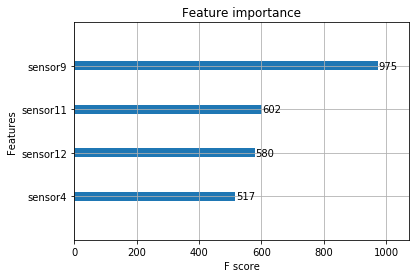

In [204]:
plot_importance(xgb)

In [205]:
data_test.columns.values

array(['sensor11', 'sensor4', 'sensor12', 'sensor9'], dtype=object)

In [206]:
xgb.feature_importances_

array([0.48698506, 0.23607858, 0.13950755, 0.1374288 ], dtype=float32)

### Analysing feature importances with SHAP

In [207]:
import shap

In [208]:
shap_values_train = shap.TreeExplainer(xgb).shap_values(data_train)
shap_values_test = shap.TreeExplainer(xgb).shap_values(data_test)

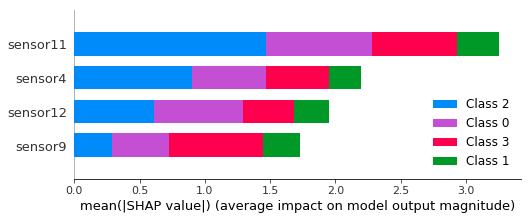

In [209]:
shap.summary_plot(shap_values_train, data_train)

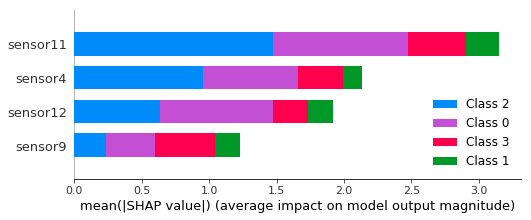

In [210]:
shap.summary_plot(shap_values_test, data_test)

In [211]:
len(shap_values_test),shap_values_test[3].shape

(4, (13096, 4))

In [212]:
data_test.columns

Index(['sensor11', 'sensor4', 'sensor12', 'sensor9'], dtype='object')

shap_values_test is a list of 4 and each of 4 items stores importances for the corresponding class<br/>
then in each item there are 13096 x 17 items, holding attributes' (17) importances for each data line

In [213]:
len(data_test.columns)

4

In [214]:
shap_class = 2
print("Relative importance for each attribute for 17 parameters with regards to class",shap_class)
print("The more the absolute value, the more important the attribute is")
for i in range(len(data_test.columns)):
    print(sum([x[i] for x in shap_values_test[shap_class]]))

Relative importance for each attribute for 17 parameters with regards to class 2
The more the absolute value, the more important the attribute is
-18608.079532749718
-12256.597949805117
-8206.978704252237
-3050.704025771236


### Analysing feature importances with ELI5

In [215]:
from eli5 import show_weights
show_weights(xgb, vec=[data_test.columns.values])

Weight,Feature
0.4870,sensor11
0.2361,sensor4
0.1395,sensor12
0.1374,sensor9


SHAP: sensor11, sensor4, sensor12, sensor7, sensor7<br/>
ELI5: sensor11, sensor4, sensor9, sensor12, sensor7

## XGB Hyperopt

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [216]:
#round(np.random.uniform(50, 1000) / 10) * 10

In [217]:
param_space = {
        'n_estimators': hp.choice('n_estimators', np.arange(50, 1000, 50, dtype=int)),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 2),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.1),
        'gamma': hp.quniform('gamma', 0, 1, 0.2),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.1),
    }

def f(params):
    global best
    clf = XGBClassifier(**params, seed=random_state)
    #acc = cross_val_score(clf, data_train, y_train.TTF_, cv=cv).mean()
    scores = cross_val_score(clf, data_train, y_train.TTF_, cv=cv, scoring='f1_micro', n_jobs=-1)
    
    if scores.mean() > best:
        best = scores.mean()
        print ('new best:', best, params)

    # Extract the best score
    best_score = scores.mean()

    # Loss must be minimized
    loss = 1 - best_score
    return {'loss': loss, 'status': STATUS_OK}

In [218]:
best=0
#trials = Trials()
#best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
#filename = 'xgb_Hyperopt_best.pkl'
#outfile = open(filename,'wb')
#pickle.dump(best,outfile)
#outfile.close()
#filename = 'xgb_Hyperopt_trials.pkl'
#outfile = open(filename,'wb')
#pickle.dump(trials,outfile)
#outfile.close()

filename = 'xgb_Hyperopt_best.pkl'
infile = open(filename,'rb')
best = pickle.load(infile)
infile.close()
filename = 'xgb_Hyperopt_trials.pkl'
infile = open(filename,'rb')
trials = pickle.load(infile)
infile.close()

In [219]:
best

{'colsample_bytree': 0.9,
 'eta': 0.42500000000000004,
 'gamma': 0.6000000000000001,
 'max_depth': 1,
 'min_child_weight': 4.0,
 'n_estimators': 36,
 'subsample': 1.0}

In [220]:
#space_eval(param_space, best)

In [221]:
xgb_HyperO = XGBClassifier(random_state=random_state,\
            n_estimators = best['n_estimators'],\
            eta = best['eta'],\
            max_depth = best['max_depth'],\
            min_child_weight = best['min_child_weight'],\
            subsample = best['subsample'],\
            gamma = best['gamma'],\
            colsample_bytree = best['colsample_bytree'],\
            eval_metric = 'auc',\
            objective = 'multi:softprob',\
            booster = 'gbtree')
#eval_set=[(data_train.iloc[:,2:], y_train.TTF_), (data_test.iloc[:,2:], y_test_long.TTF_)],
#early_stopping_rounds=50,  verbose=False
xgb_HyperO.fit(data_train, y_train.TTF_) # , sample_weight=w_array

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eta=0.42500000000000004,
              eval_metric='auc', gamma=0.6000000000000001, learning_rate=0.1,
              max_delta_step=0, max_depth=1, min_child_weight=4.0, missing=None,
              n_estimators=36, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1.0, verbosity=1)

In [222]:
cv_score_train = cross_val_score(xgb_HyperO,data_train,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.693, array([0.667, 0.671, 0.719, 0.704, 0.705]))

In [223]:
cv_score_val = cross_val_score(xgb_HyperO,data_val,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.673, array([0.584, 0.616, 0.799, 0.761, 0.606]))

In [224]:
cv_score_test = cross_val_score(xgb_HyperO,data_test,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.773, array([0.8  , 0.692, 0.776, 0.796, 0.801]))

In [225]:
predict_xgb_train = get_predicts(xgb_HyperO,data_train)
predict_xgb_val = get_predicts(xgb_HyperO,data_val)
predict_xgb_test = get_predicts(xgb_HyperO,data_test)

In [226]:
conf_train = get_confmatrix(y_train['TTF_'],predict_xgb_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_xgb_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_xgb_test)

Pct / Total / Diagonal:  70.64 17618 12445
Upper triangle sum (overestimating):  291 698 2980 3969
Lower triangle sum (underestimating):  242 774 188 1204
less10 10to50 50to100 more100
[[ 655  291    0    0]
 [ 242 2500  227  471]
 [   0  774  546 2980]
 [   0  126   62 8744]]
Pct / Total / Diagonal:  72.85 3013 2195
Upper triangle sum (overestimating):  41 124 466 631
Lower triangle sum (underestimating):  44 112 31 187
less10 10to50 50to100 more100
[[ 113   41    0    0]
 [  44  392   20  104]
 [   0  112  122  466]
 [   0   12   19 1568]]
Pct / Total / Diagonal:  80.46 13096 10537
Upper triangle sum (overestimating):  6 308 1844 2158
Lower triangle sum (underestimating):  21 228 152 401
less10 10to50 50to100 more100
[[  11    6    0    0]
 [  21  540   86  222]
 [   0  228  236 1844]
 [   0  108   44 9750]]


In [227]:
scores_train = get_scores(y_train['TTF_'],predict_xgb_train)
scores_val = get_scores(y_val['TTF_'],predict_xgb_val)
scores_test = get_scores(y_test_long['TTF_'],predict_xgb_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.706, 0.613, 0.647, 0.706, 0.706, 0.695, 0.695, 0.706, 0.631, 0.706]
[0.729, 0.638, 0.679, 0.729, 0.729, 0.729, 0.733, 0.729, 0.647, 0.729]
[0.805, 0.535, 0.752, 0.805, 0.805, 0.606, 0.779, 0.805, 0.589, 0.805]


In [228]:
#conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
#conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
#conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['xgb_HyperO',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
                    [scores_train, scores_val,scores_test]])

## XGB Regression

In [229]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [230]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
xgbr = XGBRegressor()
#eval_set=[(data_train.iloc[:,2:], y_train.TTF_), (data_test.iloc[:,2:], y_test_long.TTF_)],
#early_stopping_rounds=50,  verbose=False
xgbr.fit(data_train, y_train.TTF)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:38:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [231]:
predict_xgbr_train = get_predicts(xgbr,data_train)
predict_xgbr_val = get_predicts(xgbr,data_val)
predict_xgbr_test = get_predicts(xgbr,data_test)

In [232]:
np.sqrt(mean_squared_error(y_train.TTF,predict_xgbr_train)),np.sqrt(mean_squared_error(y_val.TTF,predict_xgbr_val)),\
np.sqrt(mean_squared_error(y_test_long.TTF,predict_xgbr_test))

(39.99703408218862, 52.797480976740296, 46.83301958519447)

In [233]:
mean_absolute_error(y_train.TTF,predict_xgbr_train),mean_absolute_error(y_val.TTF,predict_xgbr_val),\
mean_absolute_error(y_test_long.TTF,predict_xgbr_test)

(28.621693209869214, 37.92831738410382, 35.31920964570765)

In [234]:
mean_absolute_percentage_error(y_train.TTF,predict_xgbr_train),mean_absolute_percentage_error(y_val.TTF,predict_xgbr_val),\
mean_absolute_percentage_error(y_test_long.TTF,predict_xgbr_test)

(inf, inf, 29.33867657899783)

In [235]:
#print(y_train[:192]['TTF'].values)
#print(predict_xgbr_train[:192])

In [236]:
#get_confmatrix(y_train['TTF_'],predict_xgb_train)
#get_confmatrix(y_val['TTF_'],predict_xgb_val)
#get_confmatrix(y_test_long['TTF_'],predict_xgb_test)

In [237]:
#print(get_scores(y_train['TTF_'],predict_xgb_train))
#print(get_scores(y_val['TTF_'],predict_xgb_val))
#print(get_scores(y_test_long['TTF_'],predict_xgb_test))

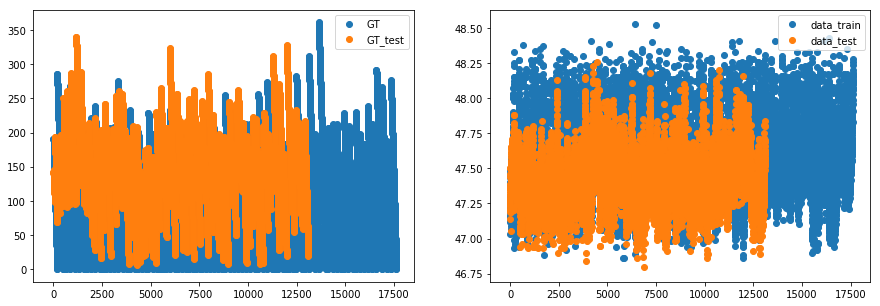

In [238]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(np.arange(0,y_train.shape[0]),y_train.TTF,label='GT')
#plt.scatter(np.arange(0,len(predict_xgbr_train)),predict_xgbr_train,alpha=0.5,label='predict')
plt.scatter(np.arange(0,y_test_long.shape[0]),y_test_long.TTF,label='GT_test')
#plt.scatter(np.arange(0,len(predict_xgbr_test)),predict_xgbr_test,alpha=0.5,label='predict_test')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(np.arange(0,data_train.shape[0]),data_train[data_train.columns[0]],label='data_train')
plt.scatter(np.arange(0,data_test.shape[0]),data_test[data_train.columns[0]],label='data_test')
plt.legend()

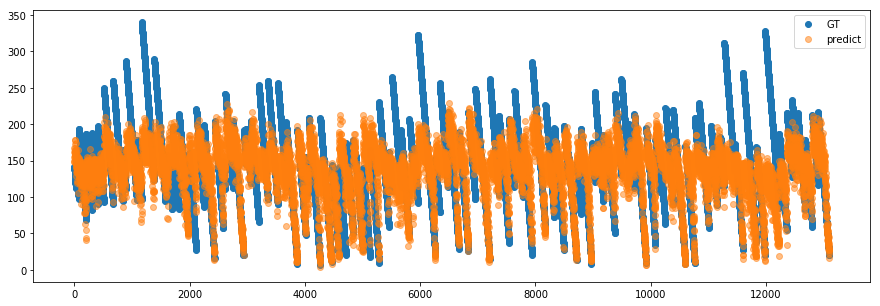

In [239]:
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,y_test_long.shape[0]),y_test_long.TTF,label='GT')
plt.scatter(np.arange(0,len(predict_xgbr_test)),predict_xgbr_test,alpha=0.5,label='predict')
plt.legend()

## kNN

In [240]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train, y_train.TTF_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [241]:
cv_score_train = cross_val_score(knn,data_train,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.664, array([0.642, 0.654, 0.712, 0.624, 0.689]))

In [242]:
cv_score_val = cross_val_score(knn,data_val,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.642, array([0.512, 0.608, 0.767, 0.745, 0.578]))

In [243]:
cv_score_test = cross_val_score(knn,data_test,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.76, array([0.796, 0.681, 0.779, 0.782, 0.764]))

In [244]:
predict_knn_train = get_predicts(knn,data_train)
predict_knn_val = get_predicts(knn,data_val)
predict_knn_test = get_predicts(knn,data_test)

In [245]:
conf_train = get_confmatrix(y_train['TTF_'],predict_knn_train);
conf_val = get_confmatrix(y_val['TTF_'],predict_knn_val);
conf_test = get_confmatrix(y_test_long['TTF_'],predict_knn_test);

Pct / Total / Diagonal:  77.74 17618 13696
Upper triangle sum (overestimating):  259 581 1521 2361
Lower triangle sum (underestimating):  168 473 920 1561
less10 10to50 50to100 more100
[[ 687  258    1    0]
 [ 168 2691  443  138]
 [   0  473 2306 1521]
 [   0  145  775 8012]]
Pct / Total / Diagonal:  68.4 3013 2061
Upper triangle sum (overestimating):  65 188 319 572
Lower triangle sum (underestimating):  23 123 234 380
less10 10to50 50to100 more100
[[  89   65    0    0]
 [  23  349  131   57]
 [   0  123  258  319]
 [   0   22  212 1365]]
Pct / Total / Diagonal:  78.04 13096 10220
Upper triangle sum (overestimating):  9 348 1243 1600
Lower triangle sum (underestimating):  24 209 1043 1276
less10 10to50 50to100 more100
[[   8    9    0    0]
 [  24  497  210  138]
 [   0  209  856 1243]
 [   0  129  914 8859]]


In [246]:
scores_train = get_scores(y_train['TTF_'],predict_knn_train)
scores_val = get_scores(y_val['TTF_'],predict_knn_val)
scores_test = get_scores(y_test_long['TTF_'],predict_knn_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.777, 0.745, 0.771, 0.777, 0.777, 0.76, 0.77, 0.777, 0.735, 0.777]
[0.684, 0.627, 0.676, 0.684, 0.684, 0.658, 0.672, 0.684, 0.606, 0.684]
[0.78, 0.546, 0.774, 0.78, 0.78, 0.534, 0.77, 0.78, 0.577, 0.78]


In [247]:
#results_list.append(['knn',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
#                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
#                    [scores_train, scores_val,scores_test]])

## kNN Scaled

In [248]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(data_train_scaled, y_train.TTF_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [249]:
cv_score_train = cross_val_score(knn_scaled,data_train_scaled,y_train.TTF_,cv=cv)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.694, array([0.688, 0.688, 0.746, 0.641, 0.71 ]))

In [250]:
cv_score_val = cross_val_score(knn_scaled,data_val_scaled,y_val.TTF_,cv=cv)
cv_score_val.mean().round(3),cv_score_val.round(3)
# (0.632, array([0.512, 0.608, 0.735, 0.737, 0.568]))

(0.673, array([0.62 , 0.56 , 0.817, 0.737, 0.631]))

In [251]:
cv_score_test = cross_val_score(knn_scaled,data_test_scaled,y_test_long.TTF_,cv=cv)
cv_score_test.mean().round(3),cv_score_test.round(3)
# (0.76, array([0.795, 0.682, 0.779, 0.786, 0.76 ]))

(0.769, array([0.788, 0.692, 0.799, 0.802, 0.764]))

In [252]:
predict_knn_train = get_predicts(knn_scaled,data_train_scaled)
predict_knn_val = get_predicts(knn_scaled,data_val_scaled)
predict_knn_test = get_predicts(knn_scaled,data_test_scaled)

In [253]:
conf_train = get_confmatrix(y_train['TTF_'],predict_knn_train);
conf_val = get_confmatrix(y_val['TTF_'],predict_knn_val);
conf_test = get_confmatrix(y_test_long['TTF_'],predict_knn_test);

Pct / Total / Diagonal:  79.59 17618 14022
Upper triangle sum (overestimating):  178 542 1459 2179
Lower triangle sum (underestimating):  134 449 834 1417
less10 10to50 50to100 more100
[[ 768  178    0    0]
 [ 134 2764  430  112]
 [   0  449 2392 1459]
 [   0  106  728 8098]]
Pct / Total / Diagonal:  72.19 3013 2175
Upper triangle sum (overestimating):  36 156 299 491
Lower triangle sum (underestimating):  27 98 222 347
less10 10to50 50to100 more100
[[ 118   35    1    0]
 [  27  377  113   43]
 [   0   98  303  299]
 [   0   15  207 1377]]
Pct / Total / Diagonal:  78.19 13096 10240
Upper triangle sum (overestimating):  8 351 1266 1625
Lower triangle sum (underestimating):  13 200 1018 1231
less10 10to50 50to100 more100
[[   9    8    0    0]
 [  13  505  246  105]
 [   0  200  842 1266]
 [   0  100  918 8884]]


In [254]:
scores_train = get_scores(y_train['TTF_'],predict_knn_train)
scores_val = get_scores(y_val['TTF_'],predict_knn_val)
scores_test = get_scores(y_test_long['TTF_'],predict_knn_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.796, 0.777, 0.79, 0.796, 0.796, 0.788, 0.789, 0.796, 0.77, 0.796]
[0.722, 0.693, 0.716, 0.722, 0.722, 0.705, 0.713, 0.722, 0.683, 0.722]
[0.782, 0.583, 0.776, 0.782, 0.782, 0.579, 0.771, 0.782, 0.593, 0.782]


In [255]:
results_list.append(['knn_scaled',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train,conf_val,conf_test],\
                    [scores_train, scores_val,scores_test]])

## kNN GridSearch

In [256]:
param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': range(1,11), 'metric': ['manhattan', 'euclidean']}

# Results

In [257]:
ff = confusion_matrix(y_train['TTF_'],predict_knn_train)
#bb = np.asarray(ff)
print('Total (sum): ', np.sum(ff))
print('Diagonal (sum): ', np.trace(ff))
print('Correct %: ', np.round(np.trace(ff)/np.sum(ff)*100,3))
print('Diagonal (elements): ', np.diagonal(ff))

Total (sum):  17618
Diagonal (sum):  14022
Correct %:  79.589
Diagonal (elements):  [2764 2392  768 8098]


In [258]:
# results_list.append(['lr',
#       [cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
#       cv_score.round(3),
#       [conf_train,conf_val,conf_test],\
#       [scores_train, scores_val,scores_test]])
results_list[0]

['lr_scaled',
 [0.709, 0.692, 0.791],
 array([0.816, 0.711, 0.801, 0.835, 0.789]),
 [array([[ 719,  226,    1,    0],
         [ 176, 2540,  547,  177],
         [   0,  585, 1715, 2000],
         [   0,   53,  881, 7998]], dtype=int64),
  array([[ 120,   34,    0,    0],
         [  32,  390,  108,   30],
         [   0,  109,  294,  297],
         [   0,    5,  143, 1451]], dtype=int64),
  array([[  11,    6,    0,    0],
         [  12,  528,  204,  125],
         [   0,  151,  837, 1320],
         [   0,   39,  579, 9284]], dtype=int64)],
 [[0.736, 0.705, 0.724, 0.736, 0.736, 0.72, 0.72, 0.736, 0.698, 0.736],
  [0.748, 0.707, 0.738, 0.748, 0.748, 0.717, 0.734, 0.748, 0.701, 0.748],
  [0.814, 0.635, 0.8, 0.814, 0.814, 0.647, 0.794, 0.814, 0.639, 0.814]]]

In [259]:
results_list[0][-1]

[[0.736, 0.705, 0.724, 0.736, 0.736, 0.72, 0.72, 0.736, 0.698, 0.736],
 [0.748, 0.707, 0.738, 0.748, 0.748, 0.717, 0.734, 0.748, 0.701, 0.748],
 [0.814, 0.635, 0.8, 0.814, 0.814, 0.647, 0.794, 0.814, 0.639, 0.814]]

In [260]:
results_list[0][4]

[[0.736, 0.705, 0.724, 0.736, 0.736, 0.72, 0.72, 0.736, 0.698, 0.736],
 [0.748, 0.707, 0.738, 0.748, 0.748, 0.717, 0.734, 0.748, 0.701, 0.748],
 [0.814, 0.635, 0.8, 0.814, 0.814, 0.647, 0.794, 0.814, 0.639, 0.814]]

In [261]:
import support_func
from importlib import reload
reload(support_func)

<module 'support_func' from 'd:\\DOC_my\\Hobby\\ML\\ML_with_Python\\timeseries\\Haustiere.git\\CMAPSS\\support_func.py'>

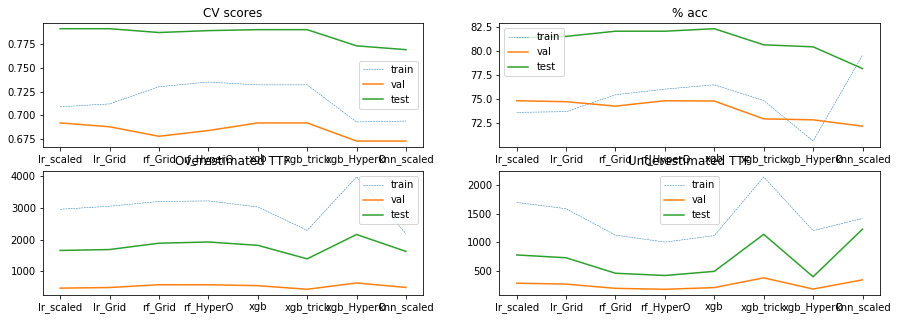

In [262]:
models, overestimated_train, overestimated_val, overestimated_test,\
underestimated_train, underestimated_val, underestimated_test,\
pct_score_train_mean, pct_score_val_mean, pct_score_test_mean = support_func.plot_results(results_list,1)

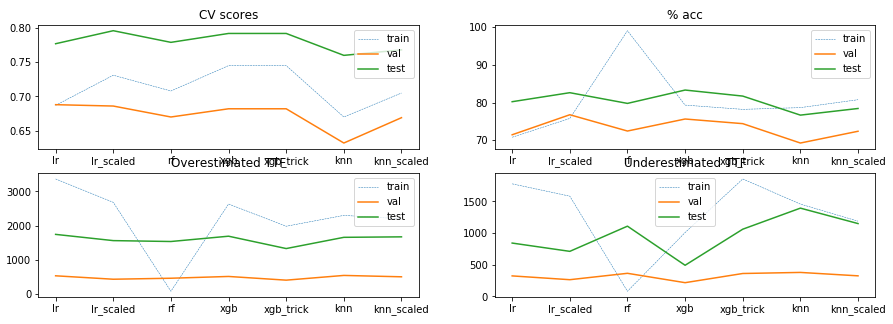

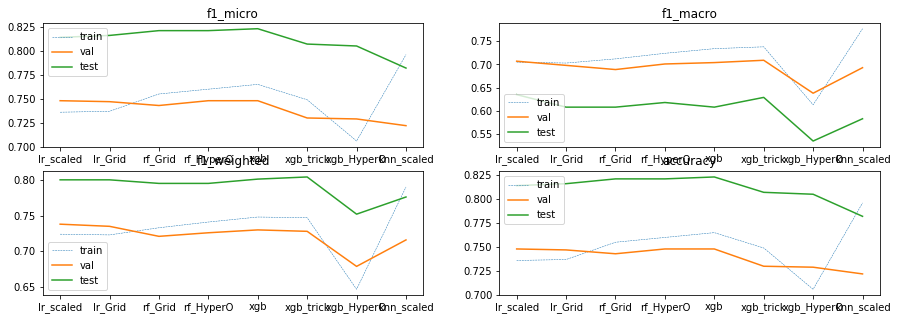

In [263]:
support_func.plot_results(results_list,2)

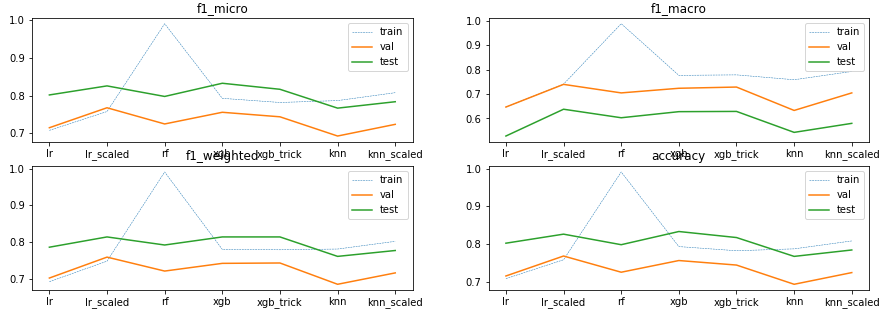

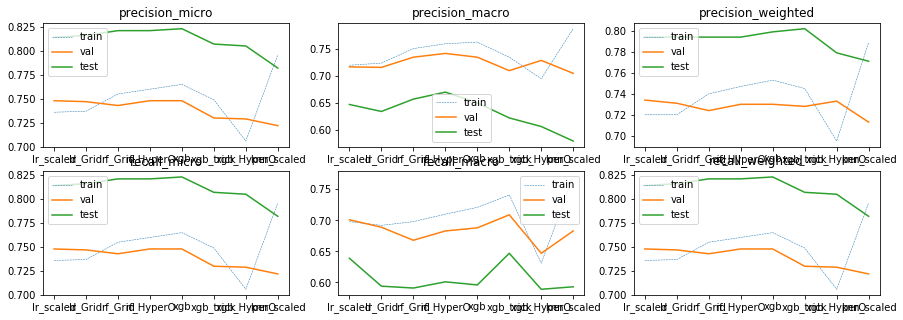

In [264]:
support_func.plot_results(results_list,3)

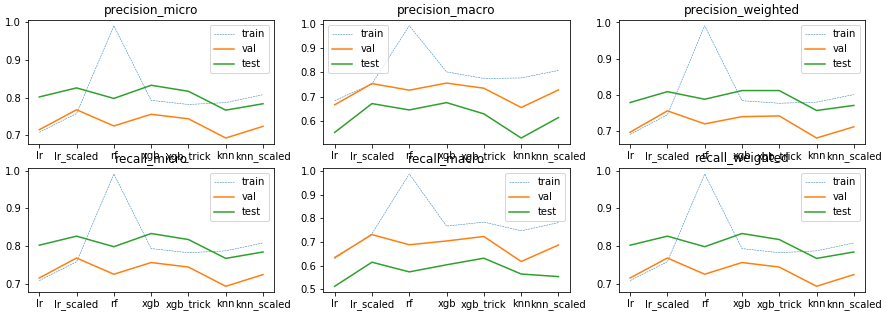

The "trick" only works partially. We indeed have less overestimated results, but in turn we're getting ~1.5x more underestimated results. Accuracy falls ~1.5%

In [265]:
print(overestimated_val[3],overestimated_val[4],overestimated_val[3]-overestimated_val[4])
print(underestimated_val[3],underestimated_val[4],underestimated_val[3]-underestimated_val[4])
print(pct_score_val_mean[3],pct_score_val_mean[4])
print(overestimated_test[3],overestimated_test[4],overestimated_test[3]-overestimated_test[4])
print(underestimated_test[3],underestimated_test[4],underestimated_test[3]-underestimated_test[4])
print(pct_score_test_mean[3],pct_score_test_mean[4])

575 547 28
183 212 -29
74.84 74.81
1922 1817 105
423 495 -72
82.09 82.35


In [266]:
print(models)
print(pct_score_test_mean)
# With all features
# ['lr', 'lr_scaled', 'rf', 'xgb', 'xgb_trick', 'knn', 'knn_scaled']
# [80.23, 82.62, 79.78, 83.32, 81.72, 76.67, 78.43]
# With only columns_to_keep features
# ['lr', 'lr_scaled', 'rf', 'xgb', 'xgb_trick', 'knn', 'knn_scaled']
# [77.83, 81.4, 77.39, 82.35, 80.67, 78.04, 78.19]

['lr_scaled', 'lr_Grid', 'rf_Grid', 'rf_HyperO', 'xgb', 'xgb_trick', 'xgb_HyperO', 'knn_scaled']
[81.4, 81.55, 82.09, 82.09, 82.35, 80.67, 80.46, 78.19]


# Analysing conf matrix

In [267]:
# slice used to filter out required data
conf_rng=slice(2850, 2950)

In [268]:
knn.classes_

array(['10to50', '50to100', 'less10', 'more100'], dtype=object)

In [269]:
# use y_test_long['TTF_'][2400:2450],predict_xgb_test[2400:2450] to get a small but representative example
analyse_conf = get_confmatrix(y_test_long['TTF_'][conf_rng],predict_knn_test[conf_rng]);

Pct / Total / Diagonal:  82.0 100 82
Upper triangle sum (overestimating):  0 2 14 16
Lower triangle sum (underestimating):  0 1 1 2
less10 10to50 50to100 more100
[[ 0  0  0  0]
 [ 0 29  2  0]
 [ 0  1 35 14]
 [ 0  0  1 18]]


In [270]:
analyse_conf.sum(axis=0),np.diag(analyse_conf),analyse_conf.sum(axis=0)-np.diag(analyse_conf)

(array([ 0, 30, 38, 32], dtype=int64),
 array([ 0, 29, 35, 18], dtype=int64),
 array([ 0,  1,  3, 14], dtype=int64))

In [271]:
print('Over optimistic',np.triu(analyse_conf,k=1).sum())
#print(analyse_conf[0][1:],analyse_conf[1][2:],analyse_conf[2][3:])
print('Too pessimistic',np.tril(analyse_conf,k=-1).sum())
#print(analyse_conf[0][:3],analyse_conf[1][2:],analyse_conf[2][3:])

Over optimistic 16
Too pessimistic 2


In [272]:
print('less10','10to50','50to100','more100')
print(confusion_matrix(y_test_long['TTF_'][conf_rng],predict_knn_test[conf_rng],labels=['less10','10to50','50to100','more100']))

less10 10to50 50to100 more100
[[ 0  0  0  0]
 [ 0 29  2  0]
 [ 0  1 35 14]
 [ 0  0  1 18]]


In [273]:
pd.crosstab(y_test_long['TTF_'][conf_rng].values, predict_knn_test[conf_rng],\
            rownames=['Actual'], colnames=['Predicted'], margins=True, dropna=False)

Predicted,10to50,50to100,more100,All
Actual,,,,
10to50,29,2,0,31
50to100,1,35,14,50
more100,0,1,18,19
All,30,38,32,100


Some notes regarding the confusion matrix...<br/>We have 197 50to100 and 114 more100 when actual RUL is 10 to 50, which means that we are too positive regarding the RUL which may lead to failure earlier than predicted.

In [274]:
y_test_long['TTF_'][conf_rng].value_counts(),y_test_long['TTF_'][conf_rng].values

(50to100    50
 10to50     31
 more100    19
 Name: TTF_, dtype: int64,
 array(['more100', 'more100', 'more100', 'more100', 'more100', 'more100',
        'more100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '10to50', '10to50', '10to50',
        '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
        '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
        '10to50', '10to50', '10to50', '10to50', '10to50

In [275]:
np.unique(predict_knn_test[conf_rng], return_counts=True),predict_knn_test[conf_rng]

((array(['10to50', '50to100', 'more100'], dtype=object),
  array([30, 38, 32], dtype=int64)),
 array(['more100', '50to100', 'more100', 'more100', 'more100', 'more100',
        'more100', 'more100', 'more100', 'more100', 'more100', '50to100',
        'more100', '50to100', 'more100', '50to100', '50to100', 'more100',
        'more100', '50to100', 'more100', 'more100', 'more100', 'more100',
        'more100', '50to100', 'more100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
        '50to100', '50to100', '50to100', '50to100', '10to50', '50to100',
        '50to100', '50to100', '50to100', '50to100', '50to100', '10to50',
        '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
        '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
        '10to50', '10to50', '10t

# ToDo

01) ~~Try TimeSeriesSplit for CV~~ Doesn't seem to affect much<br/>
02) ~~Try predict_proba and cumulative sum for probabilities~~ Done - see the graphs<br/>
03) Try Quantile regression<br/>
04) Try Ordinal regression / mord<br/>
05) Try NN<br/>
06) Try XGB sample_weight (possibly with predict_proba, but it can offset the results - take care)<br/>
07) ~~Do Scaling for LR and KNN~~<br/>
08) ~~GridSearchCV and HyperO~~<br/>
09) ~~Limit to 3 params~~<br/>
10) roc_curve<br/>
11) add time-related features (like mean(param1), std(param1) in previous 5 rows)<br/>
12) check XGB hyperopt and its ROC_AUC metric<br/>